In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=sns.load_dataset('titanic')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h2>check null or missing values</h2>

In [ ]:
dataset.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<h2>how many survived and how many died</h2>

In [ ]:
dataset['survived'].value_counts()

,count
survived,
0,549
1,342


In [ ]:
# 1 indicates survived person and 0 indicate not survived

In [ ]:
print(f"Out of 891 passengers:\n{(549/891)*100:.2f}% people died.\n{(342/891)*100:.2f}% people survived.")


Out of 891 passengers:
61.62% people died.
38.38% people survived.


In [ ]:
#the percentage  of survival is less

<h2>now we find no of male and female</h2>

In [ ]:
gender_count=dataset['sex'].value_counts()
print(gender_count)
print(gender_count.index)
print(gender_count.values)

sex
male      577
female    314
Name: count, dtype: int64
Index(['male', 'female'], dtype='object', name='sex')
[577 314]


In [ ]:
#bar graph is bi variate graph and it is used for describing categorical,variable and frequency

#plotting the graph

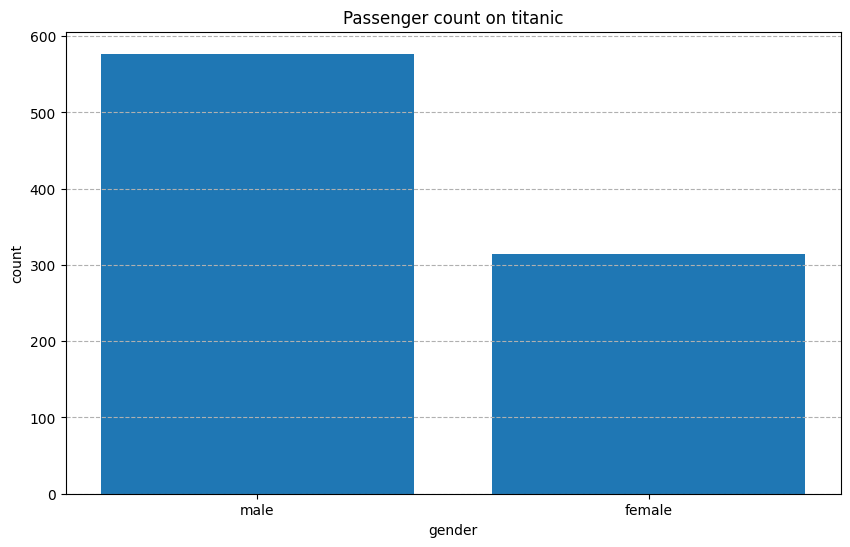

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(gender_count.index,gender_count.values)
plt.xlabel("gender")
plt.ylabel("count")
plt.title("Passenger count on titanic")
plt.grid(True,axis='y',linestyle='--')

<h2> plotting of age distribution</h2>

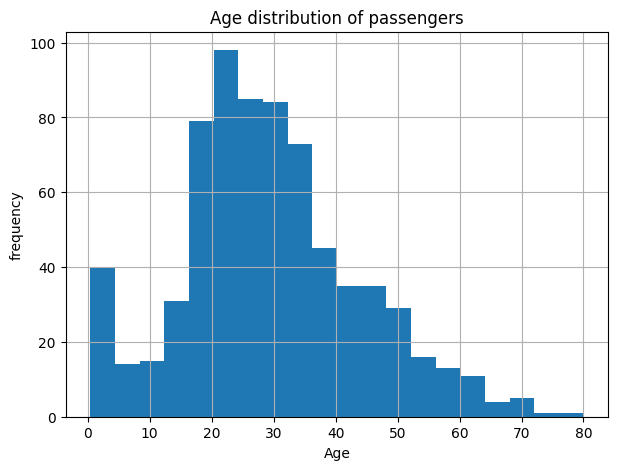

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(dataset['age'].dropna(),bins=20)
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.grid(True)
plt.show()



In [ ]:
## mostly people are age between 20 -40

<h2> now find survival rate based on gender</h2>

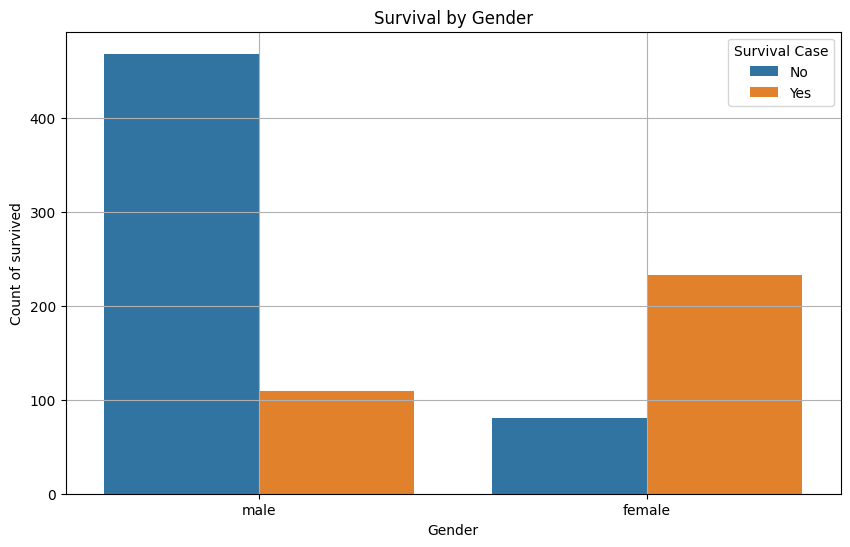

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex',hue='survived', data=dataset)
plt.title('Survival by Gender')
plt.xlabel("Gender")
plt.ylabel("Count of survived")
plt.legend(title='Survival Case', labels=['No','Yes'])
plt.grid(True)
plt.show()

In [ ]:
# because of this countplot we find that female are more survived than male
#infact male count are more but survival of female are more

<h2> how does fare vary with class</h2>

Text(0, 0.5, 'Fare count')

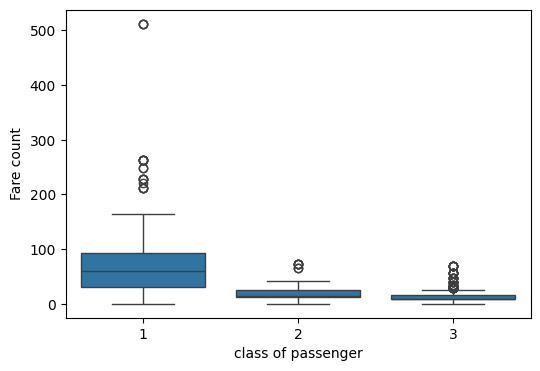

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='pclass',y='fare',data=dataset)
plt.xlabel('class of passenger')
plt.ylabel('Fare count')

In [ ]:
## with above anylisys we get
# 1class passenger have high fare
#2  class passenger have moderate fare
#3 class pasenger have low fare

In [ ]:
#ouliers shoew that tickets are extremly hight compare to its real price

<h2>is age realted to fare price</h2>

Text(0.5, 0, 'Age of passengers')

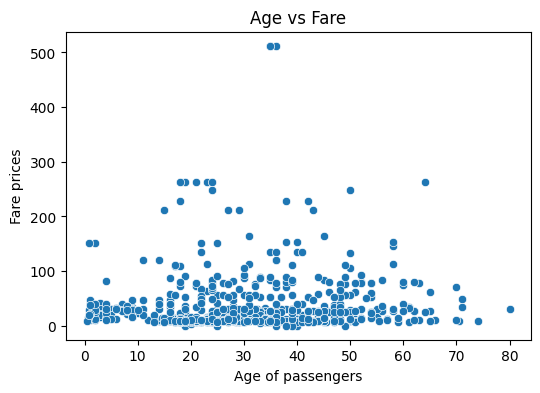

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='fare',data=dataset)
plt.title('Age vs Fare')
plt.ylabel('Fare prices')
plt.xlabel("Age of passengers")

In [ ]:
#younger and middle age paseenger has low fare     - at bottom left

<h2>how does age and fare vary across survival and gender</h2>


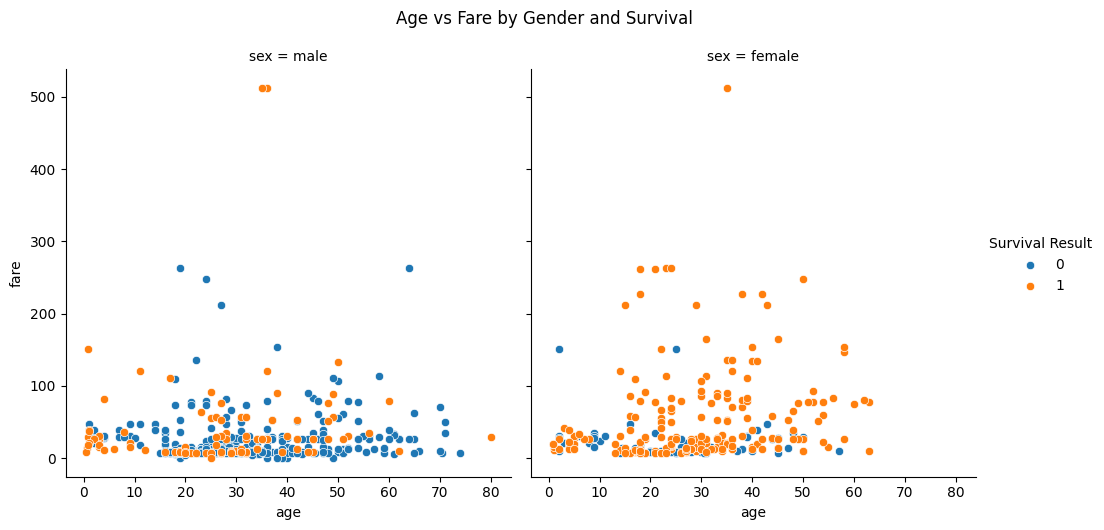

In [ ]:
# MULTIVARIATE CHART
g=sns.FacetGrid(dataset,col='sex',hue='survived',height=5)
g.map_dataframe(sns.scatterplot,x='age',y='fare')
g.add_legend(title='Survival Result')
g.fig.suptitle('Age vs Fare by Gender and Survival',y=1.05)#for gap after y axis
plt.show()

<h2>1) Was survival related to gender and passenger class?</h2>
<h2>2) Does age impact survival differently for men and women</h2>
<h2>3) Was fare a factor in survival ? Did rich people survive more.</h2>
<h2>4)Which combination of features seem most related to survival?</h2>

**#1) Was survival related to gender and passenger class?**

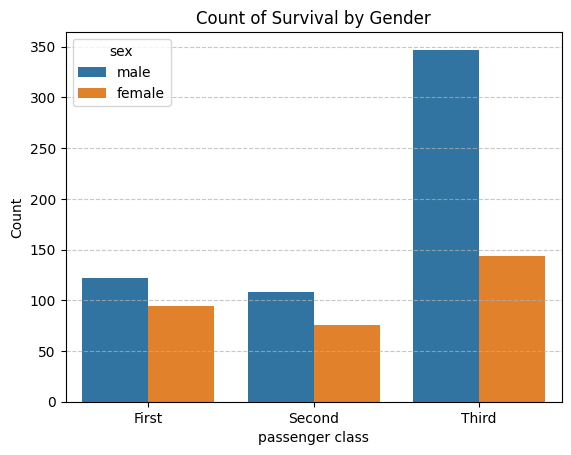

In [59]:
# Count plot of Survived (0 = died, 1 = survived) split by Sex
sns.countplot(x='class', hue='sex', data=dataset)
plt.title('Count of Survival by Gender')
plt.xlabel('passenger class')
plt.ylabel('Count')
plt.legend(title='sex')
plt.grid(True ,axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
##women survival is more than men in every class
#higher class paseenger has better survival rate
#3rd class male has lowest chance of survival


**2) Does age impact survival differently for men and women**



In [ ]:
#lets make new column

In [ ]:
def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 30:
        return 'young_Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

dataset['age_group'] = dataset['age'].apply(age_group)



In [ ]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young_Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,Senior
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,Senior
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,Child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,young_Adult
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,Teen


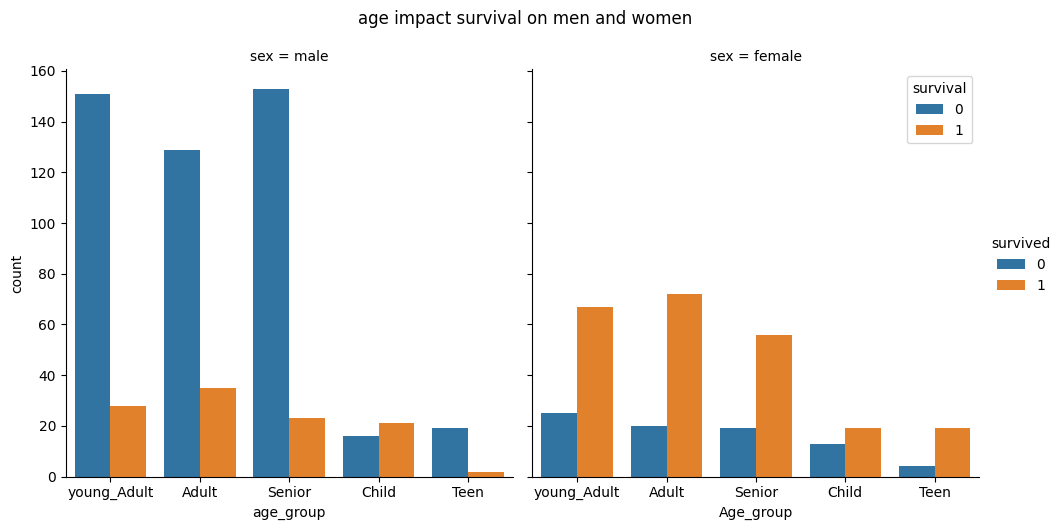

In [ ]:
sns.catplot(x='age_group',hue='survived',col='sex',kind='count',data=dataset)
plt.xlabel('Age_group')
plt.ylabel('count')
plt.suptitle('age impact survival on men and women',y=1.05)
plt.legend(title='survival')
plt.show()

In [61]:
#second method to solve ques no 2


<h5>kernal density evolution graph</h5>

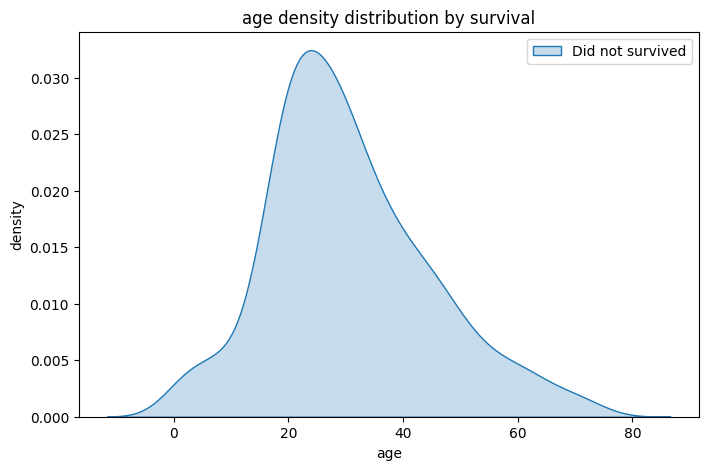

In [64]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=dataset[dataset['survived']==0],x='age',label='Did not survived',fill=True)
plt.title('age density distribution by survival')
plt.xlabel('age')
plt.ylabel('density')
plt.legend()
plt.show()


**3) Was fare a factor in survival ? Did rich people survive more **

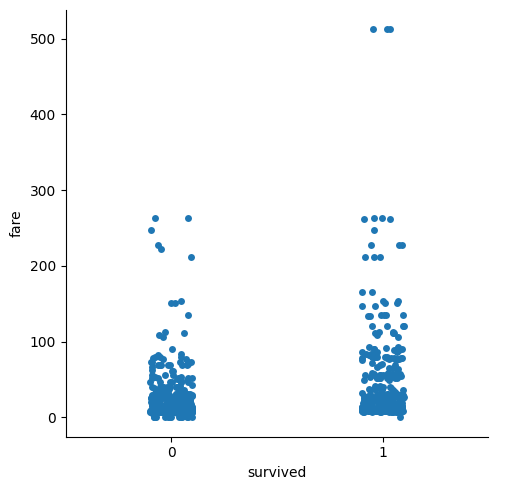

In [ ]:
sns.catplot(x='survived',y='fare',data=dataset)
plt.show()

In [ ]:
dataset.groupby('survived')['fare'].mean()


,fare
survived,
0,22.117887
1,48.395408


In [ ]:
#it shows survival people gives more fare

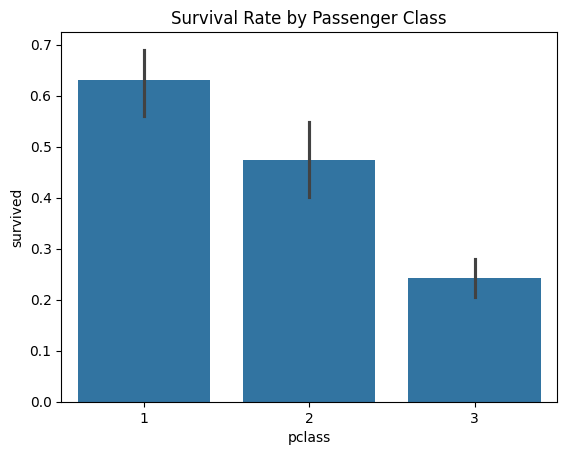

In [ ]:
sns.barplot(x='pclass', y='survived', data=dataset)
plt.title('Survival Rate by Passenger Class')
plt.show()

**4)Which combination of features seem most related to survival?**

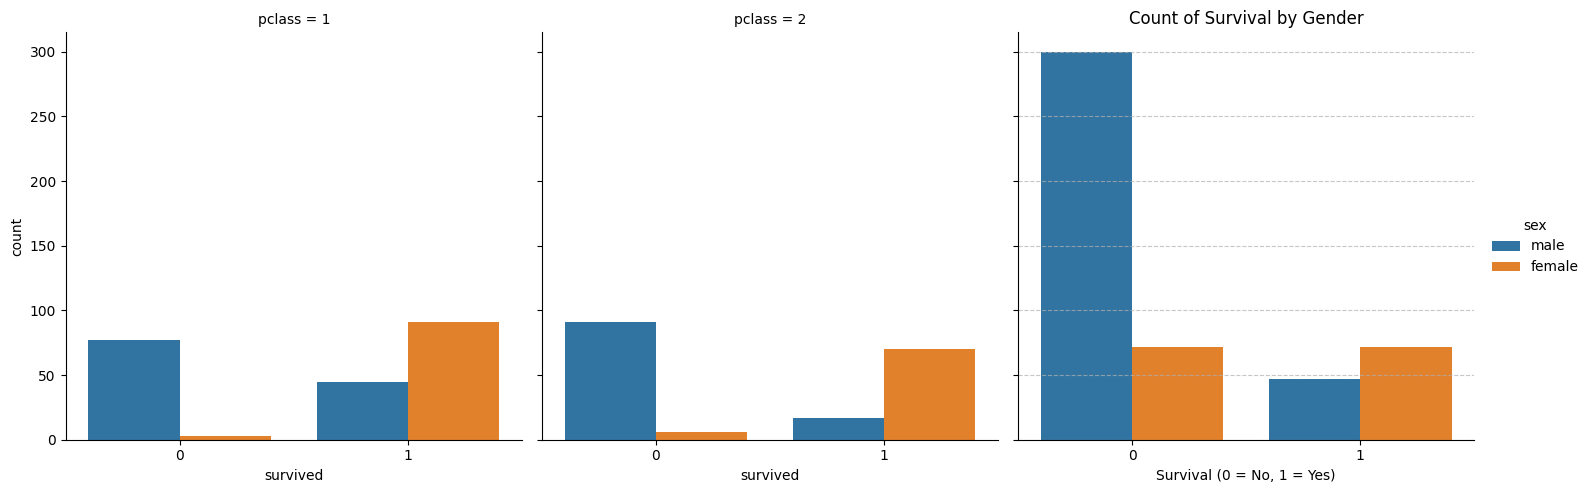

In [ ]:
sns.catplot(x='survived', hue='sex',col='pclass',kind='count' ,data=dataset)
plt.title('Count of Survival by Gender')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
plt.grid(True ,axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'fare vs survival by class')

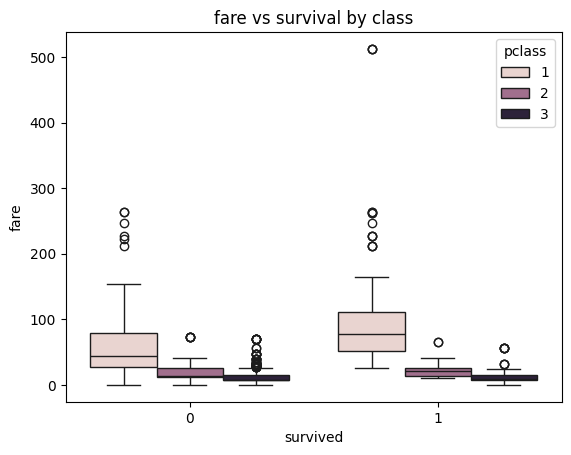

In [ ]:
sns.boxplot(x='survived',y='fare',hue='pclass',data=dataset)
plt.title("fare vs survival by class")

In [ ]:
#on conclusion
#more survival is female + 1pclass + more fare  are more survival combination

In [70]:
#2nd method of ques no 4

In [67]:
data_corr=dataset.corr(numeric_only=True)

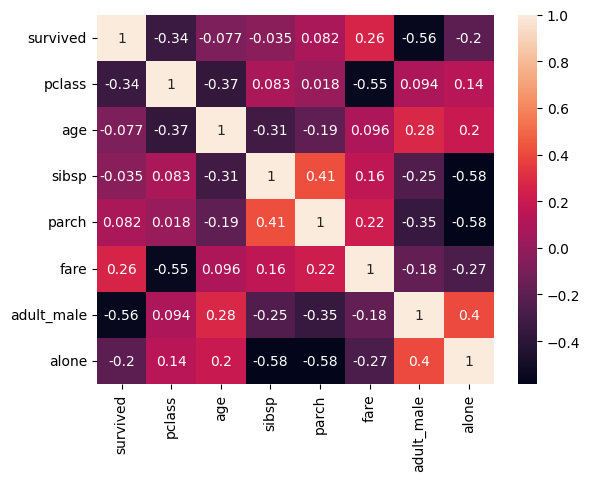

In [69]:
sns.heatmap(data_corr,annot=True)
plt.show()